<h3>Section 1: Business Understanding</h3>

<h4>This project aims to predict annual salary based on coding experience, education level, and remote work status. It helps uncover key factors that influence tech salaries. The insights can guide individuals and organizations in career planning and decision-making.</h4>

<h4>Question 1: How does the years of experice influence the annual salary for developers?</h4>
<h4>Question 2: Is there an impact of education on the annual salary?</h4>
<h4>Question 3: Does work type effect the annual salary?</h4>


In [201]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, precision_score, recall_score, f1_score,r2_score,confusion_matrix, classification_report
from sklearn.tree import DecisionTreeRegressor
import shap
import sklearn
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
#Build a machine learning model to predict developer salaries based on various factors 
#Build a regression model (linear regression or random forest) to predict salary.
#Evaluate the model’s performance using metrics 
#CompTotal is the annual salary

<h3>Section 2: Data Understanding</h3>

In [173]:
df = pd.read_csv(r'C:\Users\jalkhonaifer\Desktop\Data science udacity\survey_results_public.csv')
#Check the informatio in the dataset by viewing few rows using head function
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


<h5>I used the info function to check the type of each column.
which will allow me to fix the type if needed</h5>

In [174]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Data columns (total 114 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    ResponseId                      int64  
 1    MainBranch                      object 
 2    Age                             object 
 3    Employment                      object 
 4    RemoteWork                      object 
 5    Check                           object 
 6    CodingActivities                object 
 7    EdLevel                         object 
 8    LearnCode                       object 
 9    LearnCodeOnline                 object 
 10   TechDoc                         object 
 11   YearsCode                       object 
 12   YearsCodePro                    object 
 13   DevType                         object 
 14   OrgSize                         object 
 15   PurchaseInfluence               object 
 16   BuyNewTool                      object 
 17   BuildvsBuy

<h5>The function describe will show the important statistics of the data </h5>

In [4]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


<h5>Finding the null values will help me to identify where are the null values and how to handle them later on</h5>

In [5]:
df.isnull().sum()

ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64

<h5>lets view the work type and check which work environment is in the lead </h5>

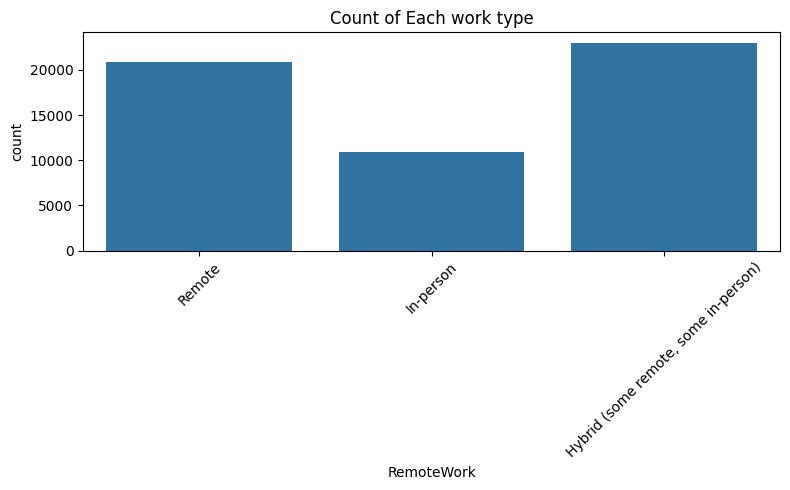

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='RemoteWork')  
plt.title('Count of Each work type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h5>This bar chart will show us the variance of years of experice </h5>

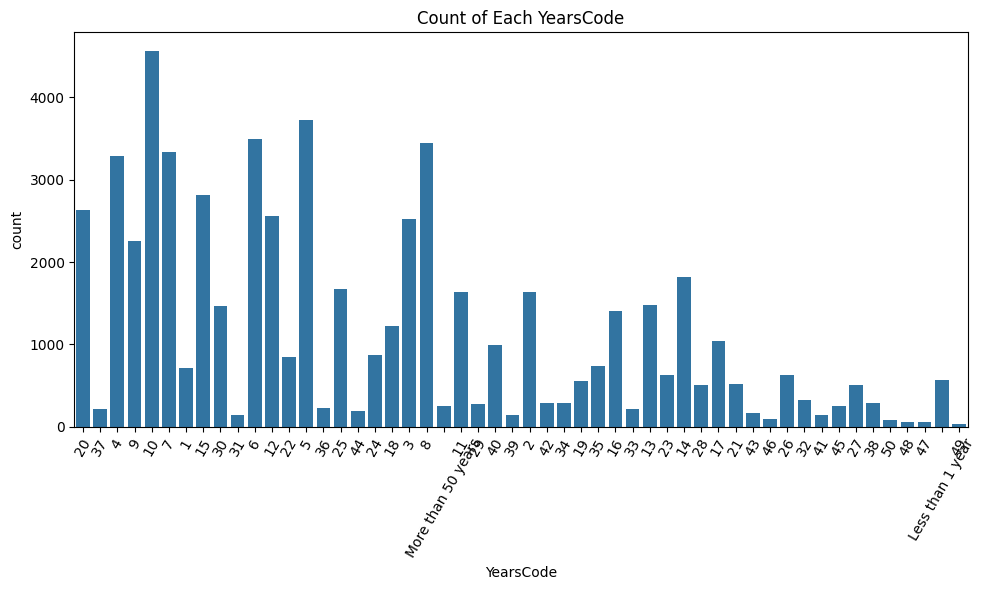

In [15]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='YearsCode') 
plt.title('Count of Each YearsCode')
plt.xticks(rotation=60) 
plt.tight_layout()  
plt.show()

In [17]:
#lets take the Currency with the highst values
df['Currency'].value_counts()

Currency
EUR European Euro            12730
USD\tUnited States dollar    10939
INR\tIndian rupee             2905
GBP\tPound sterling           2614
CAD\tCanadian dollar          1639
                             ...  
SZL\tSwazi lilangeni             1
none\tCook Islands dollar        1
AWG\tAruban florin               1
BBD\tBarbadian dollar            1
BMD\tBermudian dollar            1
Name: count, Length: 142, dtype: int64

<h3>Section 3: Data Cleaning</h3>

<h5>I decided that i will take the annual salaries in EUR as it contains the highest count and to prevent errors with the currancy conversion</h5>

In [19]:
df_Eur = df[df['Currency'] == 'EUR European Euro']
df_Eur.shape[0]

12730

In [20]:
#check the odd values if any and clean the data
df_Eur['CompTotal'].value_counts()

CompTotal
60000.0     479
50000.0     446
80000.0     362
70000.0     352
100000.0    336
           ... 
42710.0       1
51300.0       1
53136.0       1
83104.0       1
40215.0       1
Name: count, Length: 967, dtype: int64

In [210]:
#convert CompTotal to numeric data into Annual_salary column and view the null values if exists
df_Eur['Annual_salary'] = pd.to_numeric(df_Eur['CompTotal'], errors='coerce')
non_numeric_values = df_Eur[df_Eur['Annual_salary'].isna()]
non_numeric_values

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,Annual_salary
353,354,I am a developer by profession,35-44 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN,NaN
386,387,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,NaN,...,0.0,0.0,0.0,0.0,0.0,Too long,Neither easy nor difficult,NaN,7.0,NaN
402,403,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Contribute to open-source projects,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,10.0,10.0,10.0,5.0,10.0,Appropriate in length,Easy,NaN,9.0,NaN
420,421,I am a developer by profession,35-44 years old,"Student, full-time;Independent contractor, fre...","Hybrid (some remote, some in-person)",Apples,Hobby;School or academic work;Professional dev...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN,NaN
437,438,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;On the job training;Oth...,Technical documentation;Blogs;Books;How-to vid...,...,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65227,65228,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;On the job training;Sch...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65291,65292,I am a developer by profession,35-44 years old,"Employed, full-time;Independent contractor, fr...",In-person,Apples,Bootstrapping a business;Professional developm...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;Other online ...,Technical documentation;Books;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65340,65341,I am a developer by profession,18-24 years old,"Employed, full-time",In-person,Apples,Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","School (i.e., University, College, etc)",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65371,65372,"I am not primarily a developer, but I write co...",25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Apples,Hobby;Professional development or self-paced l...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Other online resources ...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
#drop values less than 1000
df_filtered = df_Eur[df_Eur['Annual_salary'] >= 10000].dropna(subset=['Annual_salary'])

In [121]:
#remove all the negative values 
df_filtered = df_filtered[df_filtered['Annual_salary'] != -9223372036854775808]
df_filtered = df_filtered[df_filtered['Annual_salary'] > 0]
df_filtered['Annual_salary'] = df_filtered['Annual_salary'].astype(int)

<h5>lets check the highest salaries</h5>

In [122]:
top_three_salaries = df_filtered['Annual_salary'].nlargest(3).astype(int)
top_three_salaries

52732    1350000
37382    1200000
8818     1000000
Name: Annual_salary, dtype: int64

<h5>lets check the lowest salaries to double check if there are negative values</h5>

In [123]:
smallest_three_salaries = df_filtered['Annual_salary'].nsmallest(3)
smallest_three_salaries

2134    10000
2193    10000
2199    10000
Name: Annual_salary, dtype: int64

<h5>I selected those column which contains important information that I think will be releavent to the annual salary.
As salaries are usually based on years of experince, and work type</h5>

In [212]:
#select the relevent columns 
df_main = df_filtered[['MainBranch','RemoteWork','EdLevel','YearsCode','YearsCodePro','DevType','Annual_salary']]
df_main.head()

,MainBranch,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,Annual_salary
374,"I am not primarily a developer, but I write co...","Hybrid (some remote, some in-person)","Professional degree (JD, MD, Ph.D, Ed.D, etc.)",12,6,Academic researcher,28000
379,I am a developer by profession,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",15,6,Data scientist or machine learning specialist,85000
385,I am a developer by profession,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,17,"Developer, back-end",50000
409,"I am not primarily a developer, but I write co...",In-person,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",50,50,Academic researcher,54000
415,I am a developer by profession,Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",21,16,"Developer, full-stack",74000


In [213]:
#lets double check the values if there are nulls or not and remove them
df_main.columns[df_main.isnull().any()].tolist()

['RemoteWork', 'YearsCode', 'YearsCodePro', 'DevType']

In [214]:
#drop null values
df_cleaned = df_main.dropna()

In [215]:

def convert_years(val):
    '''
    the function changes the string values YearsCode and YearsCodePro to integers as our ML wont accept strings
    Input the value of the cell in the column yearscode
    output the numeric value of the cell
    
    '''
    if isinstance(val, str):
        if "More than" in val:
            return 51
        
    try:
        return float(val)
    except:
        return None

df_cleaned.loc[:, 'YearsCode'] = df_cleaned['YearsCode'].apply(convert_years)
df_cleaned.loc[:, 'YearsCodePro'] = df_cleaned['YearsCodePro'].apply(convert_years)

<h3>How does the years of experice influence the annual salary for developers?</h3>

<h5>Right-skewed charts suggests that most people earn less or have fewer years of coding, while a smaller number have very high salaries or extensive experience.</h5>

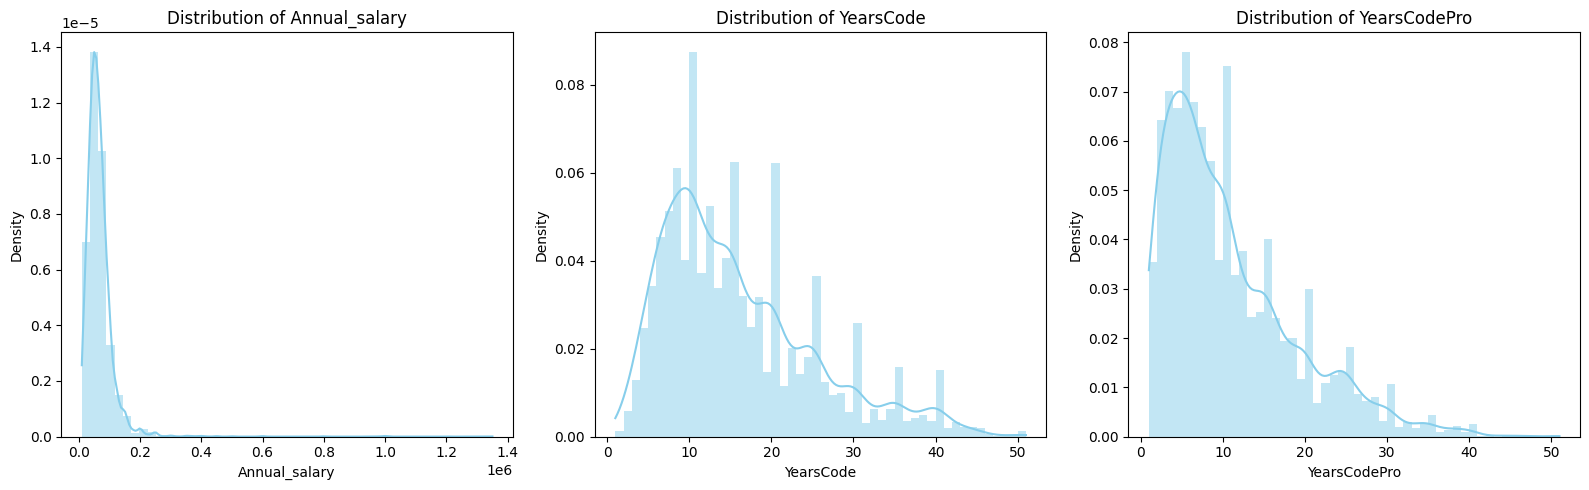

In [129]:
continuous_vars = ['Annual_salary', 'YearsCode', 'YearsCodePro']
plt.figure(figsize=(16, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, len(continuous_vars), i + 1)
    sns.histplot(df_cleaned[col], kde=True, color='skyblue', stat="density", bins=50, linewidth=0)
    plt.title(f'Distribution of {col}')
plt.tight_layout()

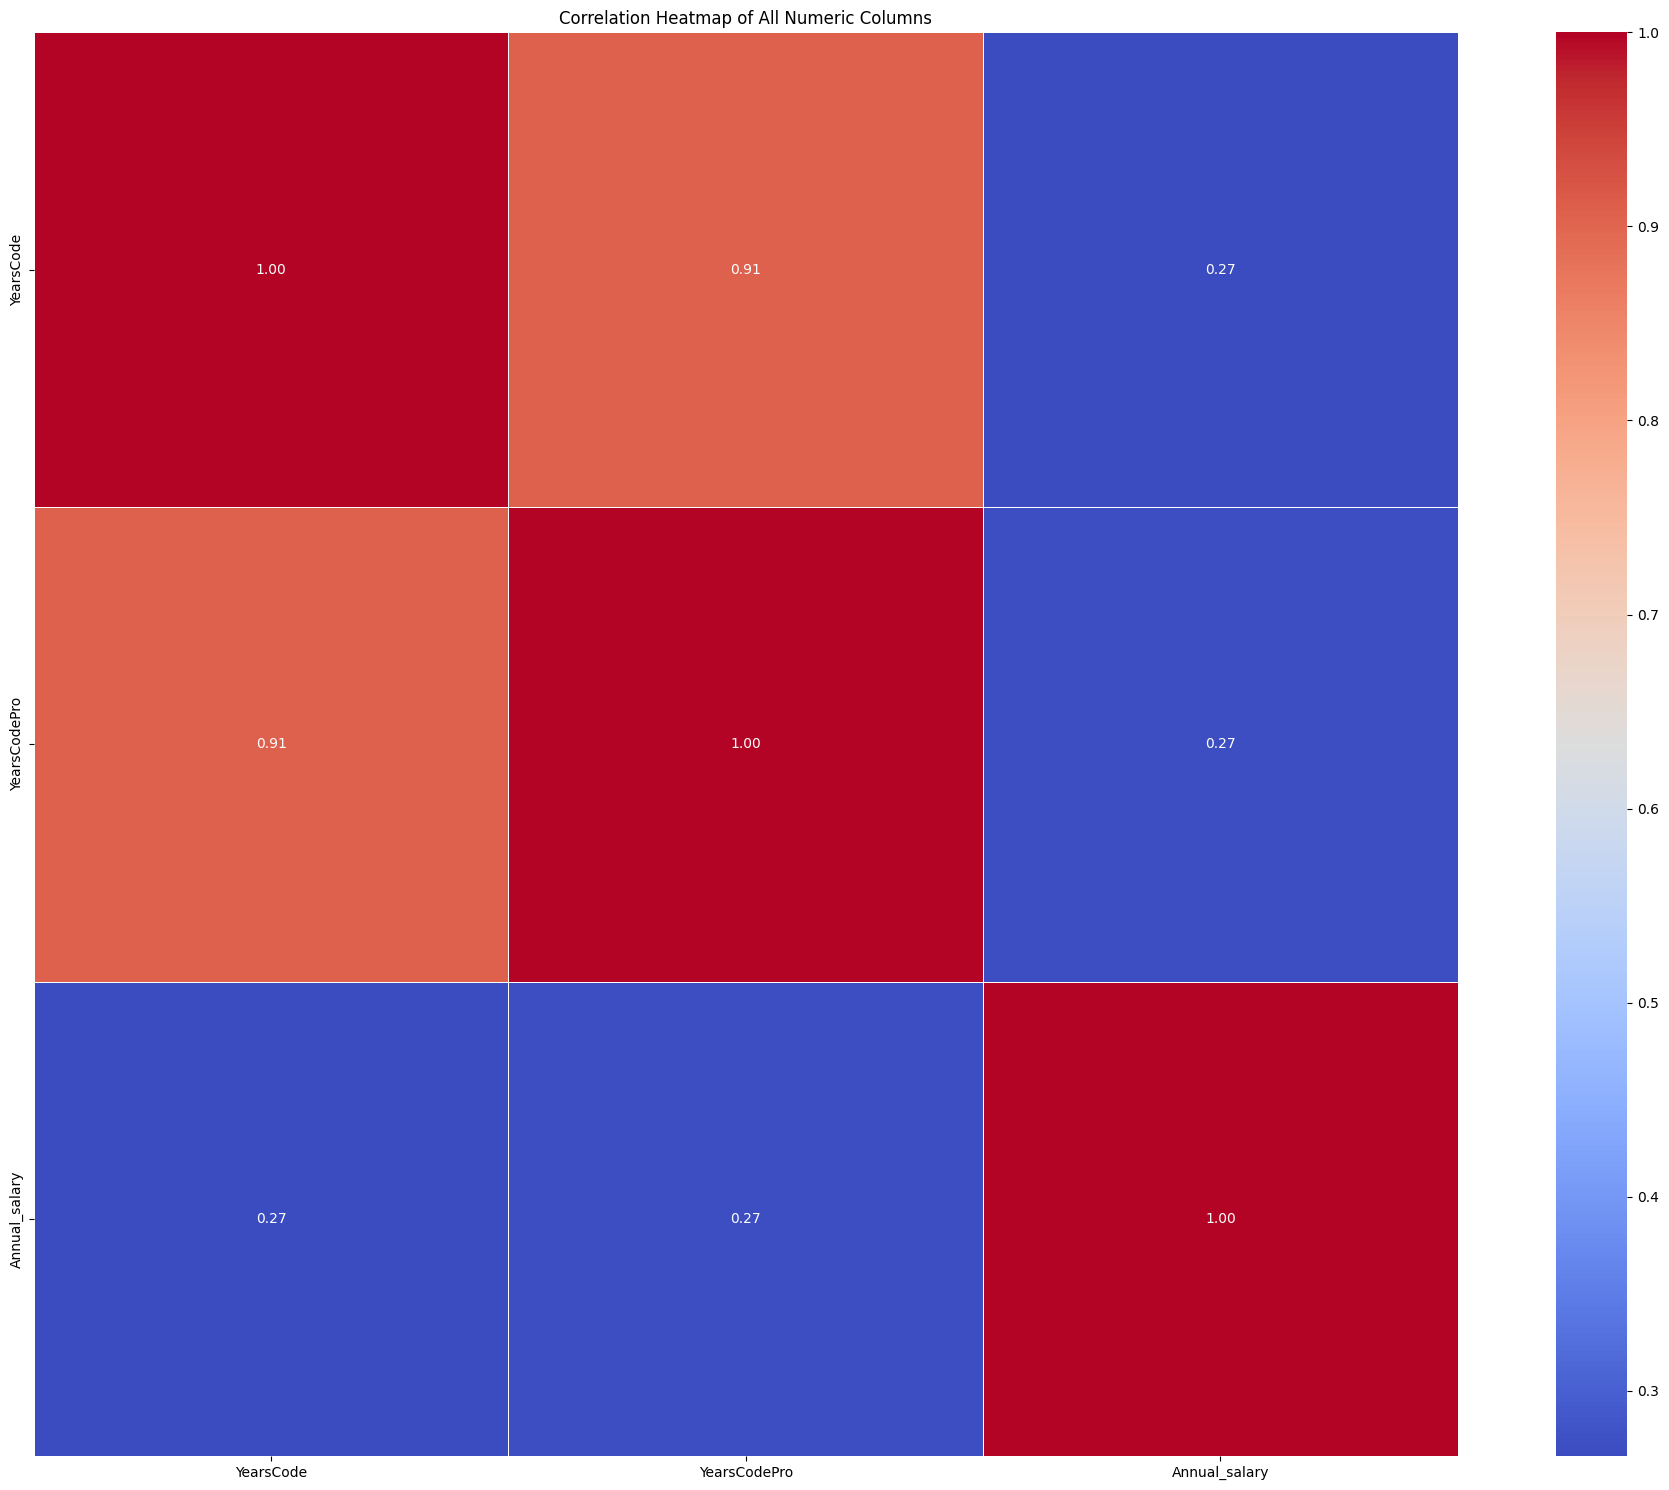

In [142]:
df_heatmap1 = df_cleaned[['YearsCode', 'YearsCodePro', 'Annual_salary']]
corr_matrix = df_heatmap1.corr()

plt.figure(figsize=(20, 15))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, square=True)
plt.title('Correlation Heatmap of All Numeric Columns')
plt.tight_layout()
plt.show()

<h5>As for the outcome there is week positive relationship between Annual salary and years of experince</h5>

<h3>Is there an impact of education on the annual salary?</h3>

C:\Users\jalkhonaifer\AppData\Local\Temp\ipykernel_14356\2262235626.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='EdLevel', y='Annual_salary', palette='viridis')


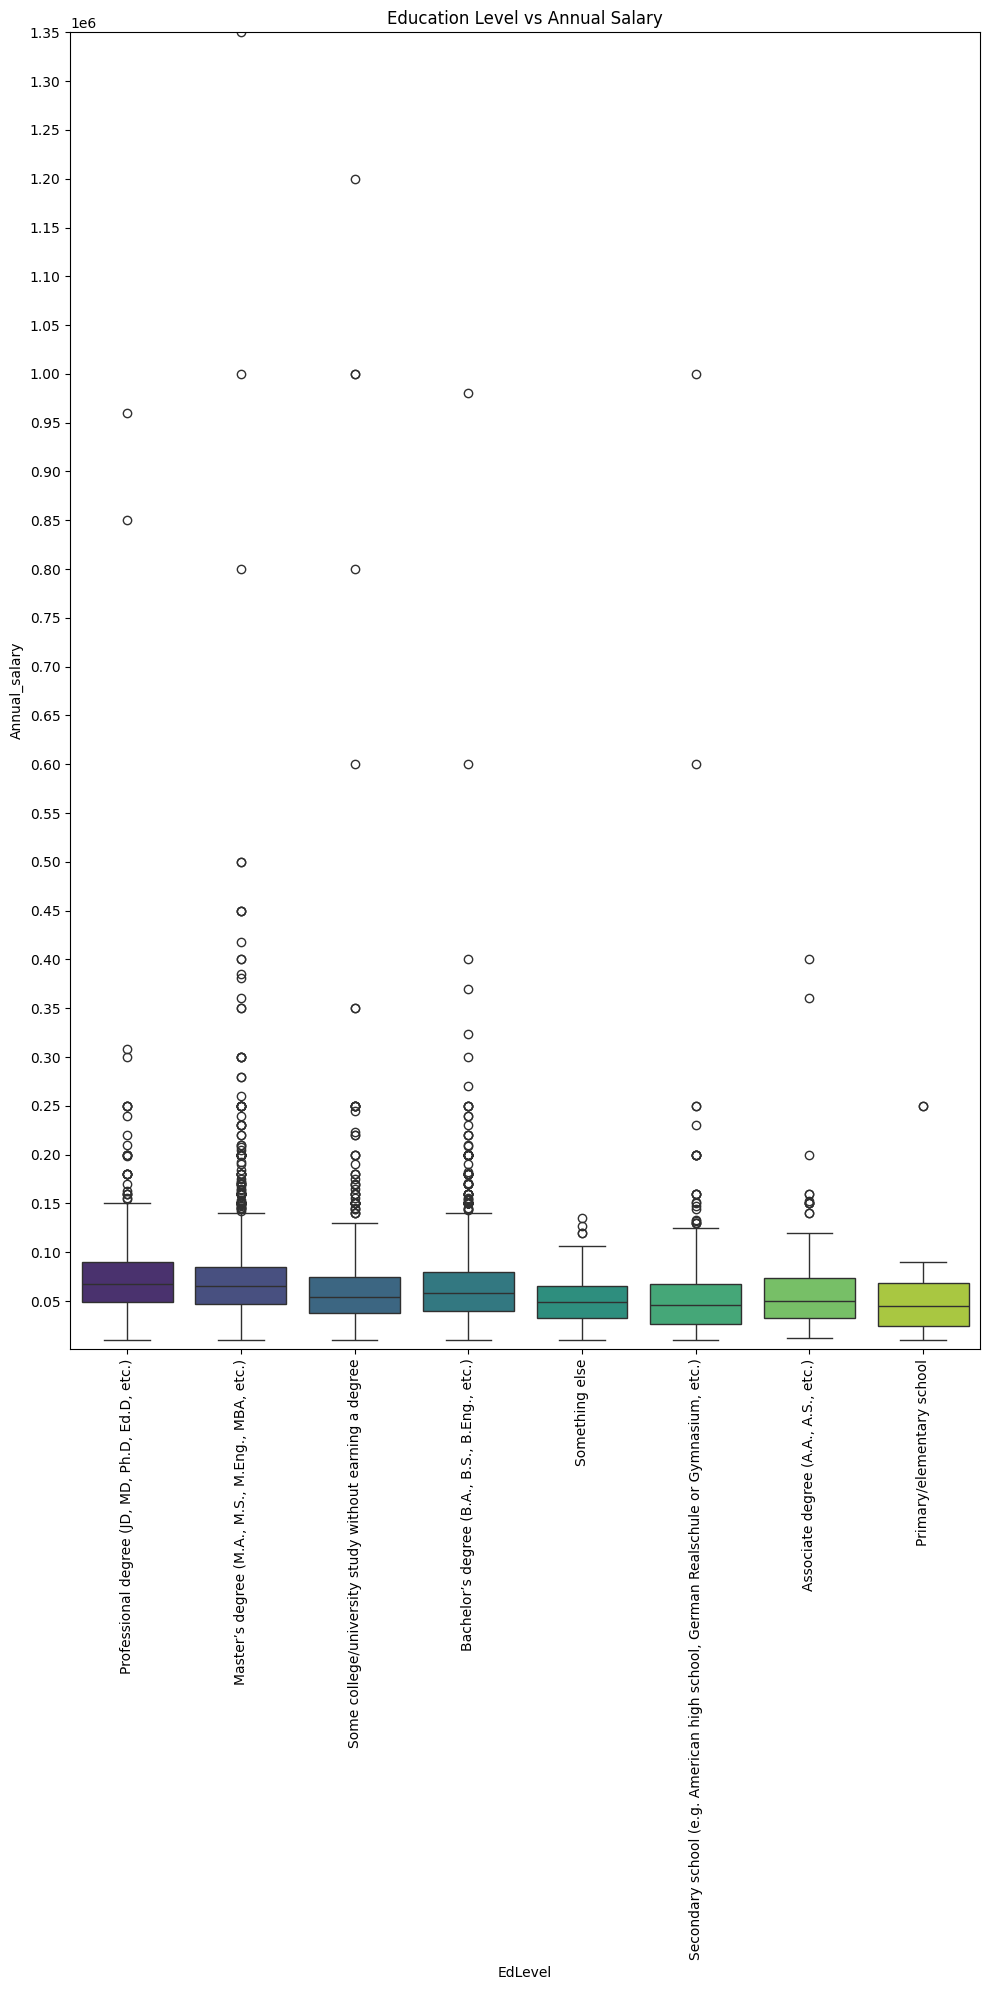

In [208]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=df_cleaned, x='EdLevel', y='Annual_salary', palette='viridis')
plt.title('Education Level vs Annual Salary')
plt.xticks(rotation=90)
plt.ylim(1000, df_cleaned['Annual_salary'].max())
plt.yticks(range(50000, int(df_cleaned['Annual_salary'].max()) + 50000, 50000))
plt.savefig("EducationVsAnnualSalary.png") 
plt.tight_layout()

<h4>It shows that the master degree have more outer layers as a higher salary. Also the mean salary gets higher with higher education</h4>

<h3>Does work type effect the annual salary?</h3>

C:\Users\jalkhonaifer\AppData\Local\Temp\ipykernel_14356\1077057947.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned, x='RemoteWork', y='Annual_salary', palette='viridis')


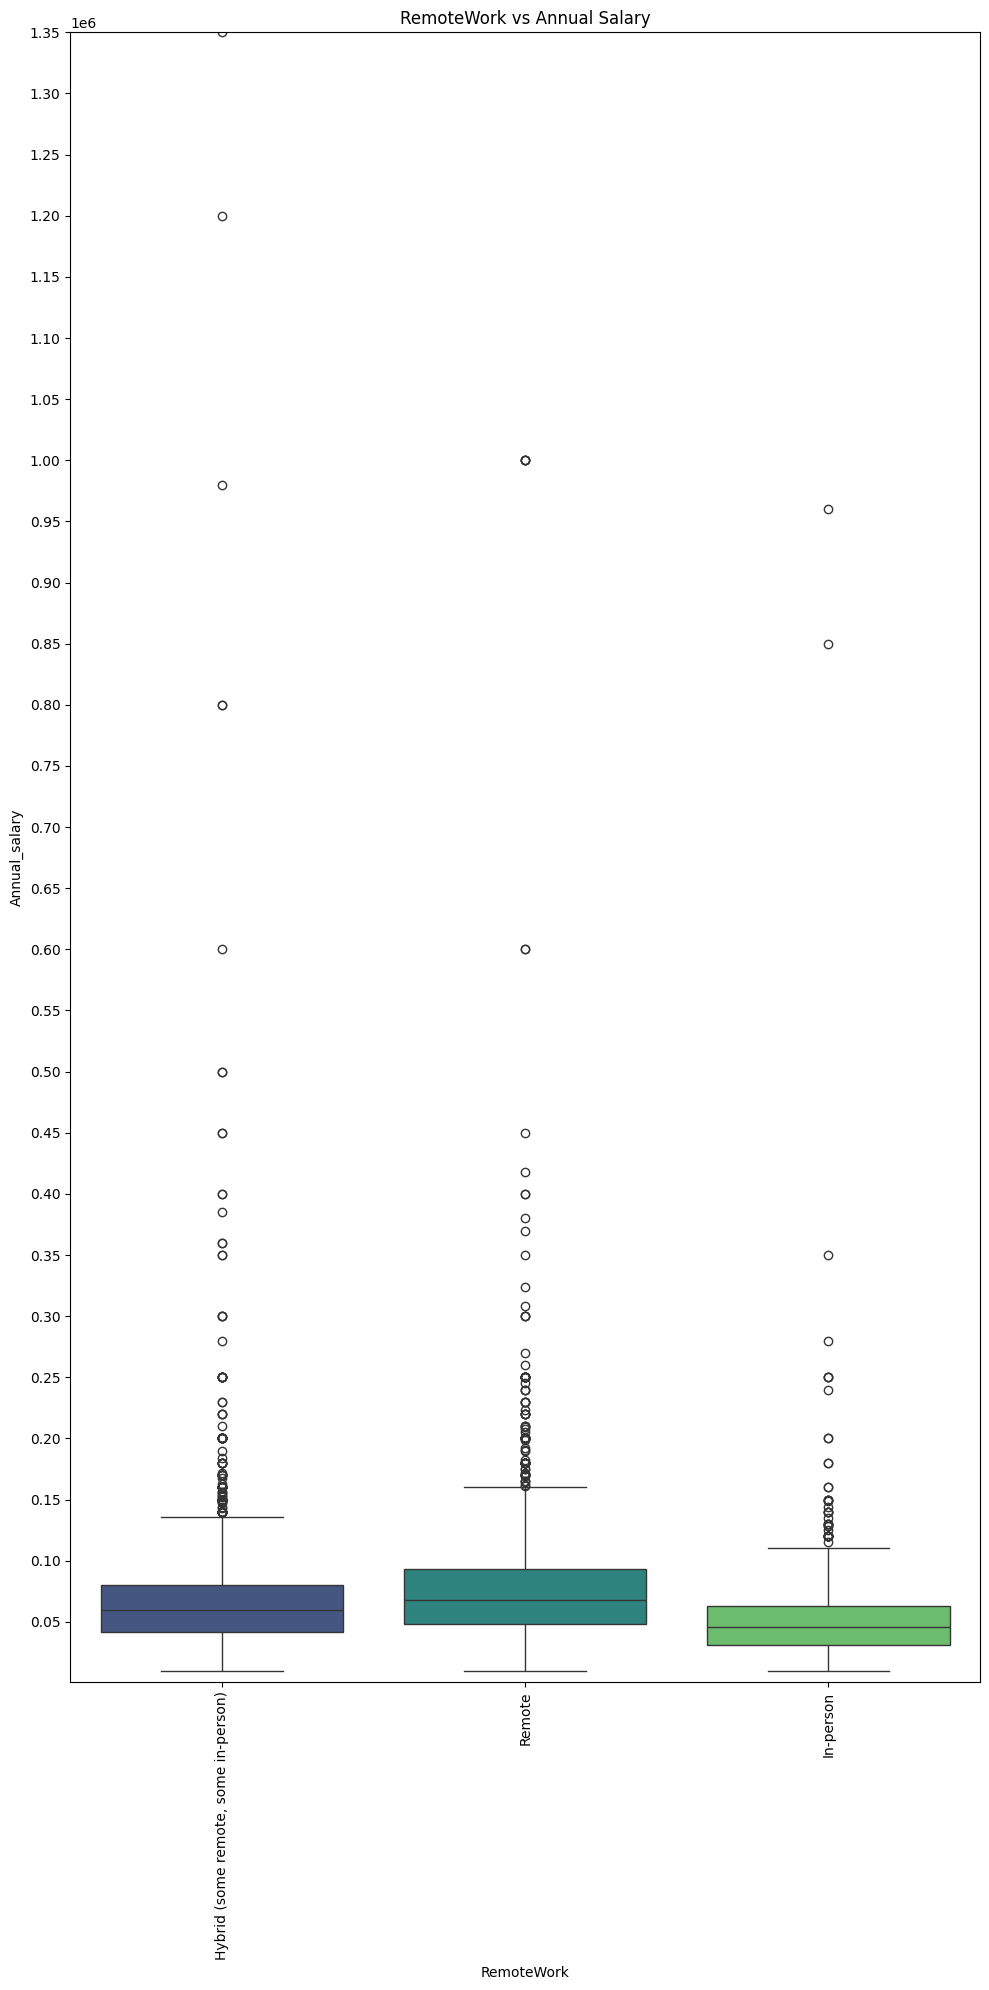

In [209]:
plt.figure(figsize=(10, 20))
sns.boxplot(data=df_cleaned, x='RemoteWork', y='Annual_salary', palette='viridis')
plt.title('RemoteWork vs Annual Salary')
plt.xticks(rotation=90)
plt.ylim(1000, df_cleaned['Annual_salary'].max())
plt.yticks(range(50000, int(df_cleaned['Annual_salary'].max()) + 50000, 50000))
plt.savefig("WorkTypeVsAnnualSalary.png") 
plt.tight_layout()


<h4>Remote job seems to have a higher mean of annual salary</h4>

<h3>Section 4: Modeling</h3>

<h3>Build a model to predict the annual salary where the work type is remote </h3>

In [217]:
#here I will convert the string columns to numiric values which will allow the ML to predict the annaul salary
selected_columns = ['EdLevel','RemoteWork']
df_to_numeric = pd.get_dummies(df_cleaned[selected_columns], drop_first=True)
bool_columns = df_to_numeric.select_dtypes(include=['bool']).columns
df_to_numeric[bool_columns] = df_to_numeric[bool_columns].astype(int)
#concatinate the new numeric data set with our original cleaned data 
df_some_numeric = pd.concat([df_cleaned, df_to_numeric], axis=1).drop(columns=selected_columns)
df_some_numeric = df_some_numeric.dropna()
df_some_numeric.columns

Index(['MainBranch', 'YearsCode', 'YearsCodePro', 'DevType', 'Annual_salary',
       'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'EdLevel_Primary/elementary school',
       'EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'EdLevel_Some college/university study without earning a degree',
       'EdLevel_Something else', 'RemoteWork_In-person', 'RemoteWork_Remote'],
      dtype='object')

In [218]:
#select the features columns and create X and y
features = [ 'YearsCode', 'YearsCodePro',  'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'EdLevel_Primary/elementary school',
       'EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'EdLevel_Some college/university study without earning a degree', 'EdLevel_Something else', 'RemoteWork_In-person', 'RemoteWork_Remote']
X = df_some_numeric[features]
y = df_some_numeric['Annual_salary']

In [165]:
#split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

<h3>Using linear regression</h3>

In [219]:
#create the linerregression modle and check the scores 
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")

# Coefficients and Intercept of the model
print(f"Model Coefficients: {model.coef_}")
print(f"Model Intercept: {model.intercept_}")

Mean Squared Error: 0.20920288640825915
Root Mean Squared Error: 0.4573870203758073
Model Coefficients: [ 0.00340353  0.01532905  0.02485823  0.10012505 -0.10001048  0.10301304
 -0.08599307 -0.05878791 -0.08107118 -0.16673957  0.07495774]
Model Intercept: 0.21676696775872328


<h5>RMSE of 0.46 indicates moderate prediction error. Higher education and remote work increase salary, while lower education and in-person work reduce it.</h5>

<h3>Decision Tree</h3>

In [207]:
#create the Decisiontree modle and check the scores 
model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


Mean Absolute Error (MAE): 0.39588688328223315
Mean Squared Error (MSE): 0.20164741428233562
Root Mean Squared Error (RMSE): 0.4490516833086539
R-squared (R²): 0.19091871844065744


C:\Users\jalkhonaifer\Documents\python\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


<h5>RMSE is 0.45 with R² of 0.19, meaning moderate error and low explanatory power. The model could be improved.</h5>

<h3>Logistic Regression</h3>

In [220]:
#create the Logistic regression modle and check the scores 
data_set = df_some_numeric[['YearsCode', 'YearsCodePro',  'EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)', 'EdLevel_Primary/elementary school',
       'EdLevel_Professional degree (JD, MD, Ph.D, Ed.D, etc.)', 'EdLevel_Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'EdLevel_Some college/university study without earning a degree', 'EdLevel_Something else',
        'RemoteWork_In-person', 'RemoteWork_Remote','Annual_salary']]
median_target = data_set['Annual_salary'].median()
data_set['Annual_salary_binary'] = (data_set['Annual_salary'] > median_target).astype(int)
X = data_set.drop(columns=['Annual_salary', 'Annual_salary_binary'])
y = data_set['Annual_salary_binary']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.6798002219755827
Confusion Matrix:
[[713 238]
 [339 512]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       951
           1       0.68      0.60      0.64       851

    accuracy                           0.68      1802
   macro avg       0.68      0.68      0.68      1802
weighted avg       0.68      0.68      0.68      1802



C:\Users\jalkhonaifer\AppData\Local\Temp\ipykernel_14356\1958904354.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set['Annual_salary_binary'] = (data_set['Annual_salary'] > median_target).astype(int)


<h3>Section 5: Result</h3>

<h4>The Logistic Regression is the best model out of the three. It achieved an accuracy of 67.98%, indicating it correctly predicted 68% of the test instances. The confusion matrix shows 713 true negatives, 238 false positives, 339 false negatives, and 512 true positives. The classification report reveals balanced precision and recall for both classes, with a slightly higher recall for class 0 (75%) compared to class 1 (60%).</h4>